In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### First figure: mean/confidence intervals of accuracy of the 3 different models (neural networks, random forest, svm)

TODO: needs errorbar/confidence interval on it

In [2]:
N = 50 # these values come from 50 fold cross-validation
nnAvgAcc = 0.496172042489
svmAvgAcc = 0.352516129032
rfAvgAcc = 0.511010752688

# C = 0.95 # want a 95% confidence interval
# alpha = (1-C)/2

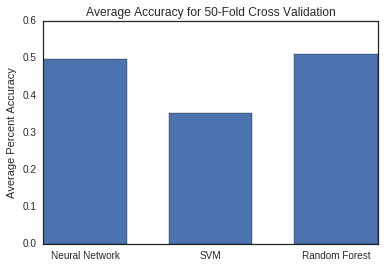

In [18]:
sns.set_style("white")
fig = plt.figure()
plt.bar([0.1, 0.4, 0.7], [nnAvgAcc, svmAvgAcc, rfAvgAcc], width=.2)
plt.ylabel('Average Percent Accuracy')
plt.xticks(np.arange(0.2, 0.8, 0.3), ('Neural Network', 'SVM', 'Random Forest'))
plt.title('Average Accuracy for 50-Fold Cross Validation')
plt.show()
fig.savefig('/home/jenna/Research/COPDImageAnalysis/figures/projects_02_avgAccuracy.png')